In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
cd D:\DATA SCIENCE\DS\Datasets

D:\DATA SCIENCE\DS\Datasets


In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
print("Shape :", df.shape)

Shape : (1338, 7)


In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

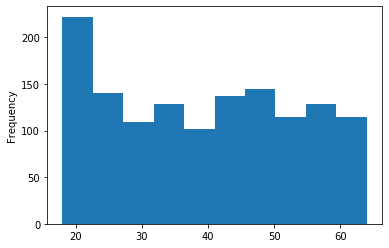

In [10]:
df['age'].plot.hist()

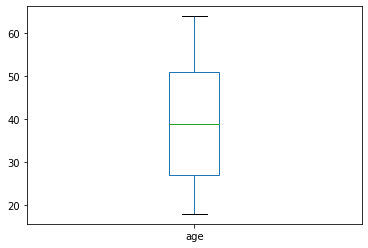

In [11]:
df['age'].plot.box()

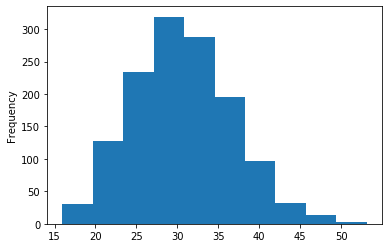

In [12]:
df['bmi'].plot.hist()

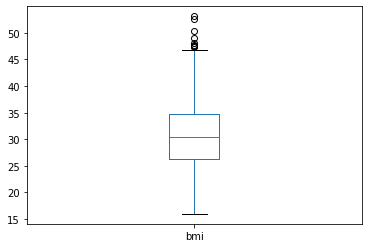

In [13]:
df['bmi'].plot.box()

In [14]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

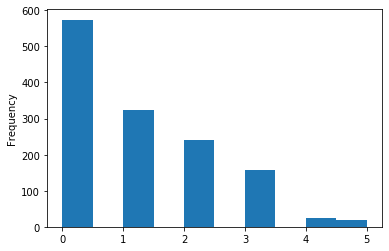

In [15]:
df['children'].plot.hist()

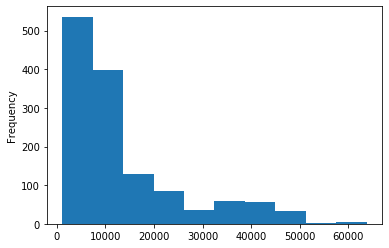

In [16]:
df['charges'].plot.hist()

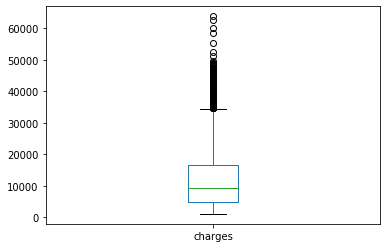

In [17]:
df['charges'].plot.box()

In [18]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

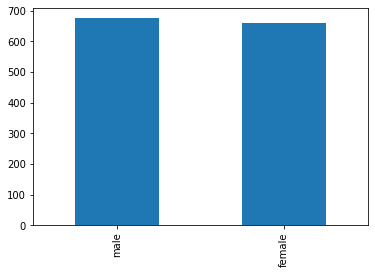

In [19]:
df['sex'].value_counts().plot.bar()

In [20]:
(df['sex'].value_counts()/len(df['sex'])*100)

male      50.523169
female    49.476831
Name: sex, dtype: float64

In [21]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

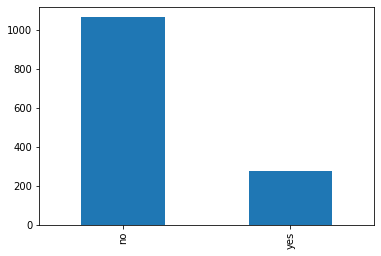

In [22]:
df['smoker'].value_counts().plot.bar()

In [23]:
(df['smoker'].value_counts()/len(df['smoker'])*100)

no     79.521674
yes    20.478326
Name: smoker, dtype: float64

In [24]:
df['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

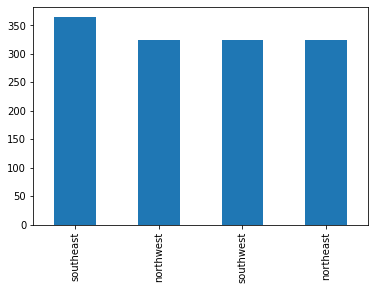

In [25]:
df['region'].value_counts().plot.bar()

In [26]:
(df['region'].value_counts()/len(df['region'])*100)

southeast    27.204783
northwest    24.289985
southwest    24.289985
northeast    24.215247
Name: region, dtype: float64

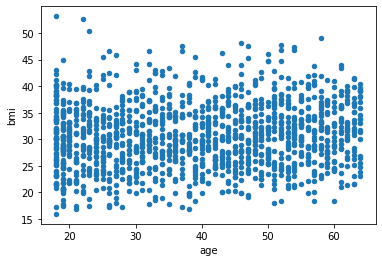

In [27]:
df.plot.scatter('age','bmi')

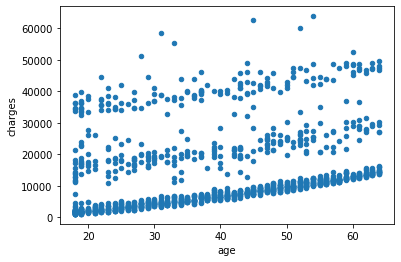

In [28]:
df.plot.scatter('age','charges')

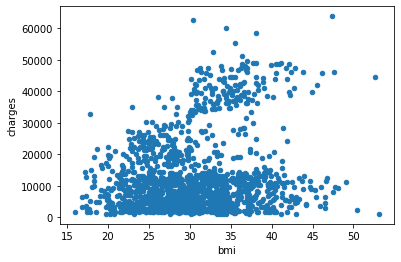

In [29]:
df.plot.scatter('bmi', 'charges')

In [30]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [31]:
df.groupby('sex')['charges'].mean()

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

In [32]:
df.groupby('children')['charges'].mean()

children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64

In [33]:
df.groupby('region')['charges'].mean()

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

In [34]:
df.groupby('smoker')['charges'].mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

In [35]:
pd.crosstab(df['sex'],df['smoker'])

smoker,no,yes
sex,,
female,547,115
male,517,159


In [36]:
pd.crosstab(df['sex'],df['region'])

region,northeast,northwest,southeast,southwest
sex,,,,
female,161,164,175,162
male,163,161,189,163


In [37]:
pd.crosstab(df['smoker'],df['region'])

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


In [38]:
df_nums = pd.get_dummies(df,drop_first=True,columns=['sex','smoker','region'])
df_nums.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [39]:
from sklearn.preprocessing import MinMaxScaler
scaleMinMax = MinMaxScaler()
df_nums[["age", "bmi"]] = scaleMinMax.fit_transform(df_nums[["age", "bmi"]])

In [40]:
df_nums.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.021739,0.321227,0,16884.92400,0,1,0,0,1
1,0.000000,0.479150,1,1725.55230,1,0,0,1,0
2,0.217391,0.458434,3,4449.46200,1,0,0,1,0
3,0.326087,0.181464,0,21984.47061,1,0,1,0,0
4,0.304348,0.347592,0,3866.85520,1,0,1,0,0


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X=df_nums.drop(['charges'],axis=1).values
y=df_nums['charges'].values

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)
y_test = y_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(936, 8) (402, 8) (936, 1) (402, 1)


In [44]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train,y_train)

y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error

r2_train = r2_score(y_train,y_pred_train)
mse_train = mean_squared_error(y_train,y_pred_train)

r2_test = r2_score(y_test,y_pred_test)
mse_test = mean_squared_error(y_test,y_pred_test)

print("r2_train : ",r2_train)
print("mse_train : ",mse_train)

print("\nr2_test : ",r2_test)
print("mse_test : ",mse_test)

r2_train :  0.7618780003618578
mse_train :  36576361.89065711

r2_test :  0.7166124432331722
mse_test :  36800107.88801562
